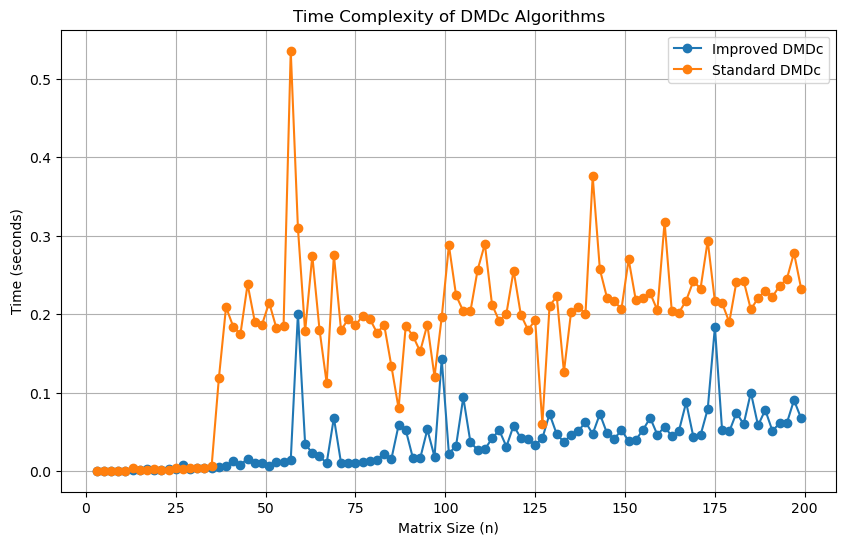

In [1]:
import numpy as np
import scipy.linalg
import time
import matplotlib.pyplot as plt
from improve_dmdc import Improved_DMDc_new, Standard_DMDC

# Define range of n values
n_values = range(3, 200, 2)  # From 3 to 100 in steps of 5
times_improved = []
times_standard = []
n_list = []

# Loop over different n
for n in n_values:
    # Generate matrices A and B
    A = scipy.linalg.helmert(n, True)
    B = np.ones((n, n))
    
    # Generate spatial and temporal points
    X = 10  # Max spatial value
    T = 300  # Max temporal value
    k = 300  # Number of temporal points
    x = np.linspace(1, X, n)
    t = np.linspace(1, T, k)
    
    # Generate random data for X_data_train and U_control
    N_t = k
    N_train = int(0.8 * N_t)
    X_data_train = np.random.rand(n, N_train)
    U_control = np.random.rand(n, N_train - 1)
    
    # Set ranks
    rank_p = 2 * n
    rank_r = n
    
    # Time Improved DMDc
    start_time = time.time()
    eigenvalues, modes, recons, bar_A, bar_B, bar_V, time_improved = Improved_DMDc_new(X_data_train, U_control, rank_p, rank_r)
    elapsed_time_improved = time.time() - start_time
    times_improved.append(elapsed_time_improved)
    
    # Time Standard DMDc
    start_time_std = time.time()
    eigenvalues_std, modes_std, recons_std, bar_A_std, bar_B_std, bar_V_std, time_standard = Standard_DMDC(X_data_train, U_control, rank_p, rank_r)
    elapsed_time_std = time.time() - start_time_std
    times_standard.append(elapsed_time_std)
    
    n_list.append(n)

# # Visualize A and B for selected n
# selected_n = [3, 10, 50, 100]
# for n in selected_n:
#     A = scipy.linalg.helmert(n, True)
#     B = np.ones((n, n))
#     plt.figure(figsize=(12, 6))
#     plt.subplot(1, 2, 1)
#     plt.title(f"A matrix (n={n})")
#     plt.pcolor(A.real)
#     plt.colorbar()
#     plt.subplot(1, 2, 2)
#     plt.title(f"B matrix (n={n})")
#     plt.pcolor(B.real)
#     plt.colorbar()
#     plt.show()

# Plot time vs n for both algorithms
plt.figure(figsize=(10, 6))
plt.plot(n_list, times_improved, label='Improved DMDc', marker='o')
plt.plot(n_list, times_standard, label='Standard DMDc', marker='o')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of DMDc Algorithms')
plt.legend()
plt.grid(True)
plt.show()

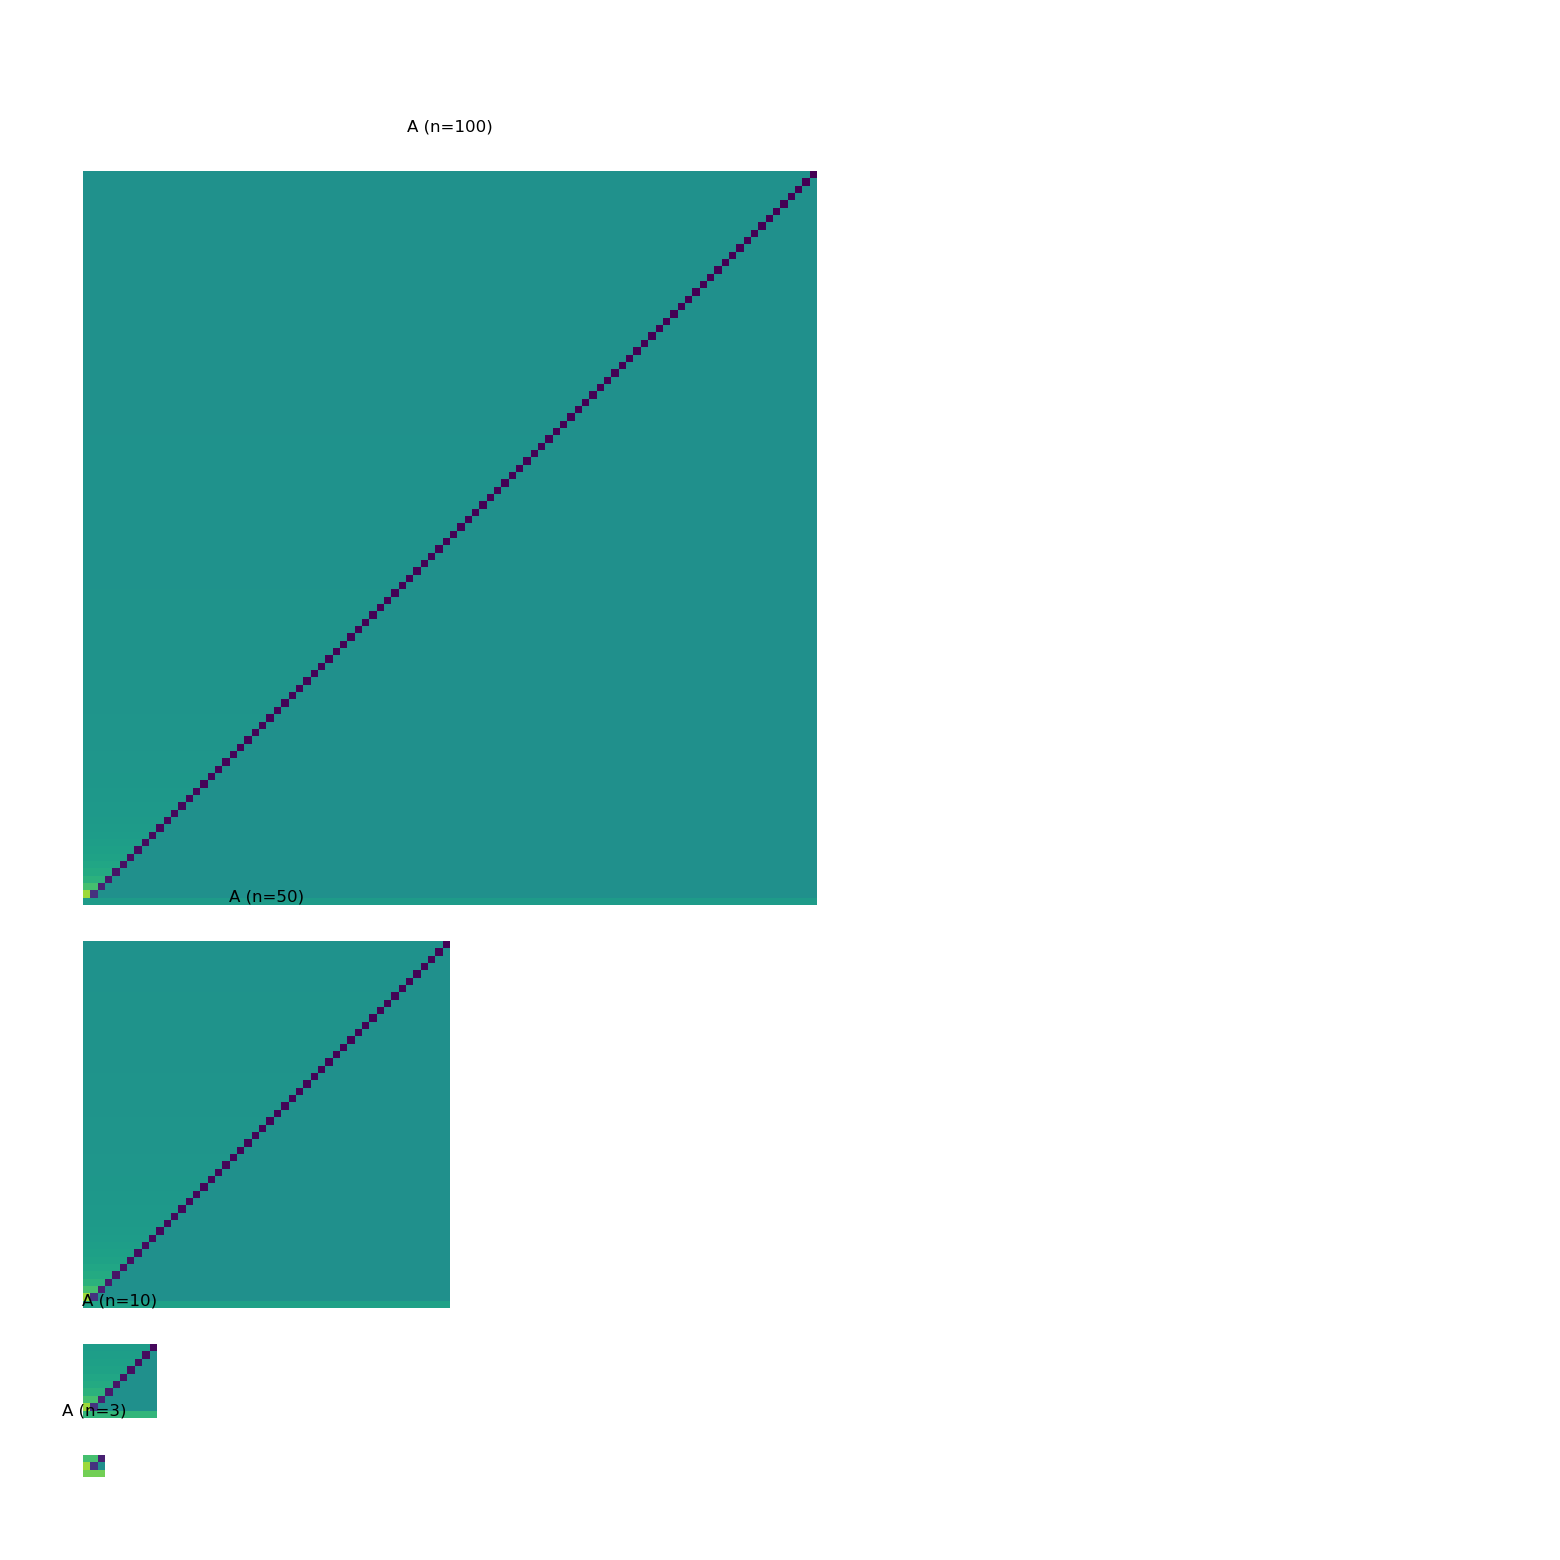

In [6]:
# sivusalize A and B matrices
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg

# Define parameters
selected_n = [3, 10, 50, 100]
gap_x = 5  # Horizontal gap between A and B
gap_y = 5  # Vertical gap between different pairs
base_x = 0  # Starting x-position
current_y = 0  # Starting y-position

# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlim(-10, 200)  # Adjust based on total width needed
ax.set_ylim(-10, 200)  # Adjust based on total height needed

# Loop over each selected n
for n in selected_n:
    # Generate matrices A and B
    A = scipy.linalg.helmert(n, True)
    B = np.ones((n, n))
    
    # Define extents for A and B
    extent_A = [base_x, base_x + n, current_y, current_y + n]
    extent_B = [base_x + n + gap_x, base_x + n + gap_x + n, current_y, current_y + n]
    
    # Plot A
    ax.imshow(A.real,
              extent=extent_A,
              origin='lower',
              cmap='viridis',
              vmin=-1,
              vmax=1)
    

    
    # Add titles
    ax.text((extent_A[0] + extent_A[1]) / 2,
            extent_A[3] + 5,
            f'A (n={n})',
            ha='center',
            va='bottom',
            fontsize=12)

    
    # Update current_y for vertical stacking
    current_y += n + gap_y

# Turn off axes ticks
ax.axis('off')

# Show the plot
plt.show()